<a href="https://colab.research.google.com/github/ttk66/Chem_analyzis/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = '/content/Данные_для_курсовои_Классическое_МО (1).xlsx'
df = pd.read_excel(file_path)

In [4]:
df.head()

,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,...,0,0,0,0,0,0,0,0,3,0
1,1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,...,0,0,0,0,0,0,0,0,3,0
2,2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,...,0,0,0,0,0,0,0,0,3,0
3,3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,...,0,0,0,0,0,0,0,0,4,0
4,4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 214 entries, Unnamed: 0 to fr_urea
dtypes: float64(107), int64(107)
memory usage: 1.6 MB


Всего в рассматриваемой таблице 1001 запись, 214 полей. Целевыми являются "IC50, mm", "CC50, mm", "SI" - эффективность, токсичность и селективность препаратов соответственно. Остальное поля являются хим. дескрипторами. Поле Unnamed: 0 хранит индексы строк, так что от него мы избавимся.


Для удобства работы переименуем целевые переменные.

In [6]:
# Переименование полей
df = df.rename(columns={
    'IC50, mM': 'IC50',
    'CC50, mM': 'CC50'
})

# Удалим колонку Unnamed: 0
df = df.drop(columns=['Unnamed: 0'])

# Проверим пропущенные значения
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

,0
MinAbsPartialCharge,3
MaxPartialCharge,3
MinPartialCharge,3
MaxAbsPartialCharge,3
BCUT2D_MWHI,3
BCUT2D_MRLOW,3
BCUT2D_MRHI,3
BCUT2D_LOGPLOW,3
BCUT2D_LOGPHI,3
BCUT2D_CHGLO,3


Мы нашли 12 признаков с пропусками. Каждый из них содержит по 3 пропуска, поскольку это достаточно небольшое кол-во мы заполним пропуски медианой.

In [7]:
# Заполним пропуски медианами
df.fillna(df.median(numeric_only=True), inplace=True)

Учитывая специфику темы курсовой, целесообразно рассмотреть логарифмы целевых переменных, поскольку, как можно видеть из предварительного просмотра данных, целевые переменные имеют экспоненциальное распределение - много маленьких значений, несколько очень больших. Логарифмирование позволит привести данные к более нормальному виду, более того в фармакологии удобно само использование логарифма.

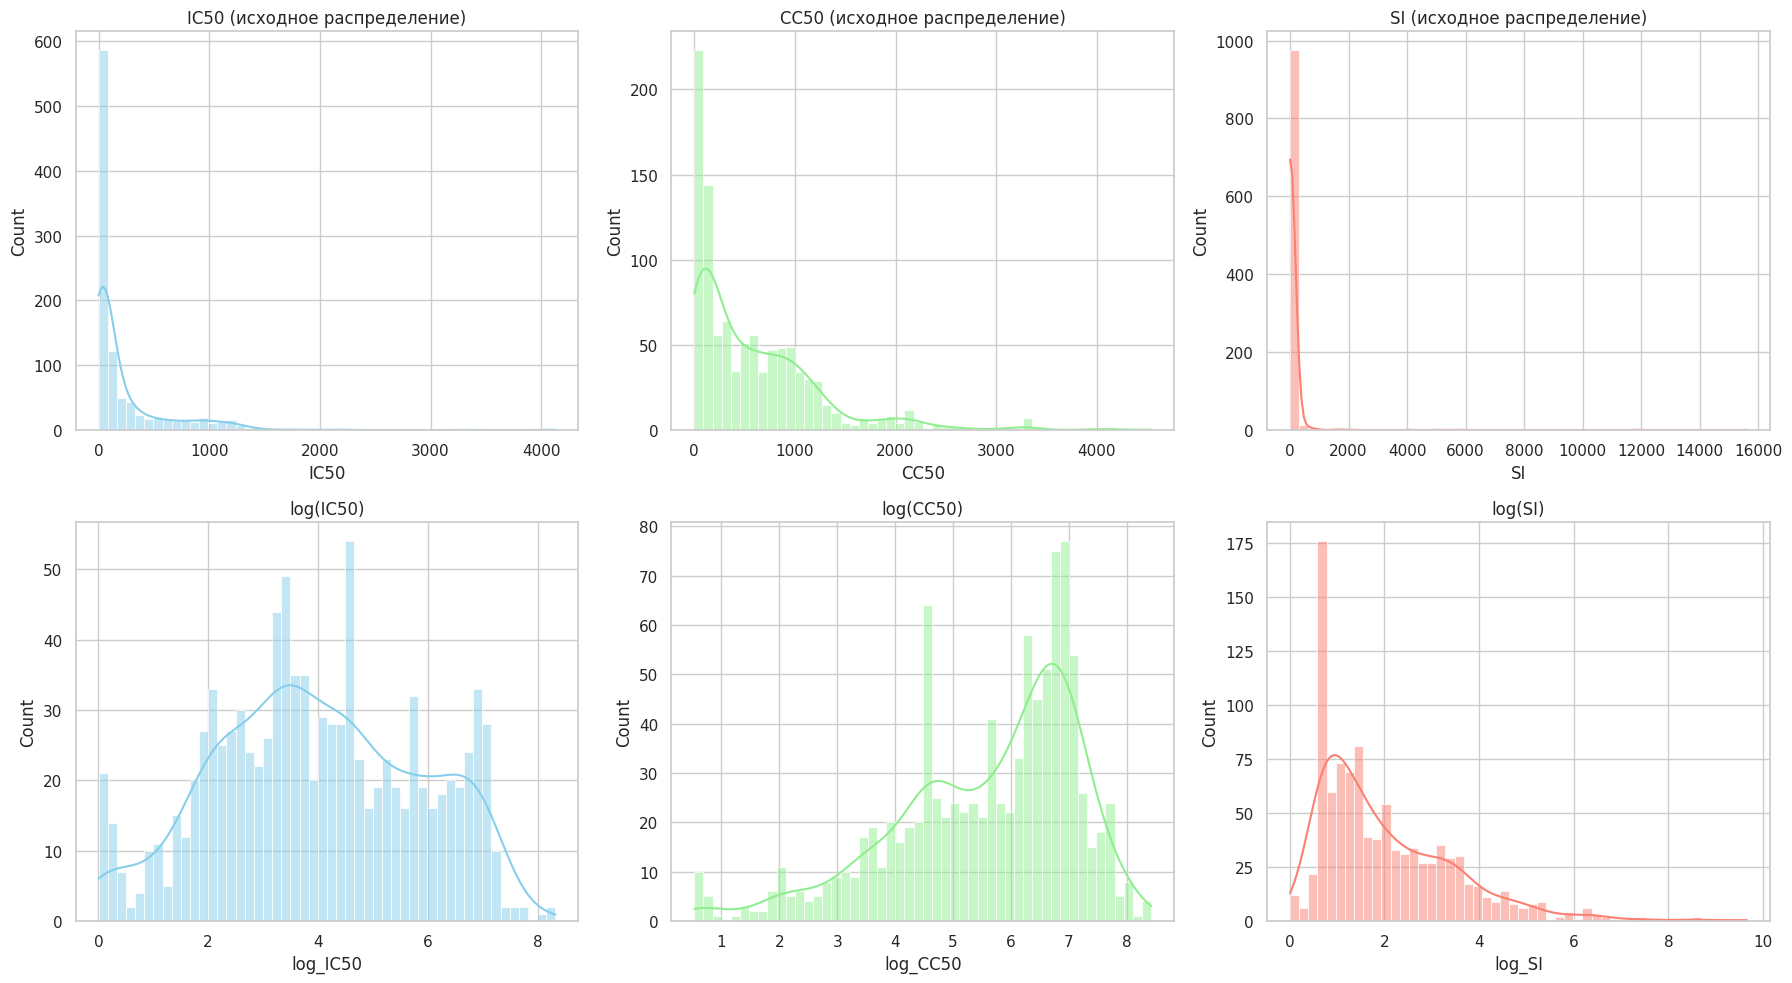

In [8]:
# Добавим логарифмы целевых переменных
df['log_IC50'] = np.log1p(df['IC50'])
df['log_CC50'] = np.log1p(df['CC50'])
df['log_SI'] = np.log1p(df['SI'])

# Настройки графиков
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Распределения до и после логарифмирования
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.histplot(df['IC50'], bins=50, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title("IC50 (исходное распределение)")

sns.histplot(df['CC50'], bins=50, kde=True, ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title("CC50 (исходное распределение)")

sns.histplot(df['SI'], bins=50, kde=True, ax=axes[0, 2], color='salmon')
axes[0, 2].set_title("SI (исходное распределение)")

sns.histplot(df['log_IC50'], bins=50, kde=True, ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title("log(IC50)")

sns.histplot(df['log_CC50'], bins=50, kde=True, ax=axes[1, 1], color='lightgreen')
axes[1, 1].set_title("log(CC50)")

sns.histplot(df['log_SI'], bins=50, kde=True, ax=axes[1, 2], color='salmon')
axes[1, 2].set_title("log(SI)")

plt.tight_layout()
plt.show()

Проведем анализ графиков:

IC50 - исходное распределение
Сильно скошен вправо
Экспоненциальное распределение
Наблюдаются экстремальные значения до 4000+

log(IC50)
Распределение становится приближенным к нормальному
Исчезает хвост

CC50 - исходное распределение:
Аналогично с IC50, график скршен вправо, наблюдаются выбросы
Экстремальные значение до 4000+

log(CC50)
Распределение становится более симметричным
Мода около 6.5 - 7.5 логарифмических единиц -> большинство соединений малотоксичны

SI:
Крайне скошен вправо, очень длинный хвост
Черезвычайно большой показатель селективности

log(SI):
Распределение по-прежнему асимметрично
Много объектов с log(SI) < 2, но есть и высокоселективные log(SI) > 6

Вывод: Логарифмирование улучшило качество данных, предсказание, построенные на этих данных, будут стабильнее и интерпретируемее.

In [11]:
# Корреляции с логарифмами
cor = df.corr(numeric_only=True)

top_log_ic50 = cor["log_IC50"].sort_values(ascending=False).head(10)
top_log_cc50 = cor["log_CC50"].sort_values(ascending=False).head(10)
top_log_si = cor["log_SI"].sort_values(ascending=False).head(10)

top_log_ic50, top_log_cc50, top_log_si

(log_IC50                    1.000000
 IC50                        0.729335
 log_CC50                    0.624289
 CC50                        0.475748
 NumSaturatedHeterocycles    0.272508
 NumAliphaticHeterocycles    0.225604
 BCUT2D_MWLOW                0.182354
 NumAromaticHeterocycles     0.176680
 VSA_EState1                 0.163491
 BCUT2D_CHGLO                0.160016
 Name: log_IC50, dtype: float64,
 log_CC50                    1.000000
 CC50                        0.769153
 log_IC50                    0.624289
 IC50                        0.438169
 BCUT2D_CHGLO                0.167211
 NumSaturatedHeterocycles    0.159512
 FpDensityMorgan2            0.158824
 FpDensityMorgan1            0.155744
 fr_Imine                    0.148011
 BCUT2D_LOGPLOW              0.138244
 Name: log_CC50, dtype: float64,
 log_SI                     1.000000
 SI                         0.400597
 FractionCSP3               0.222259
 fr_Imine                   0.193280
 fr_NH2                   

Построим тепловые карты на каждый таргет

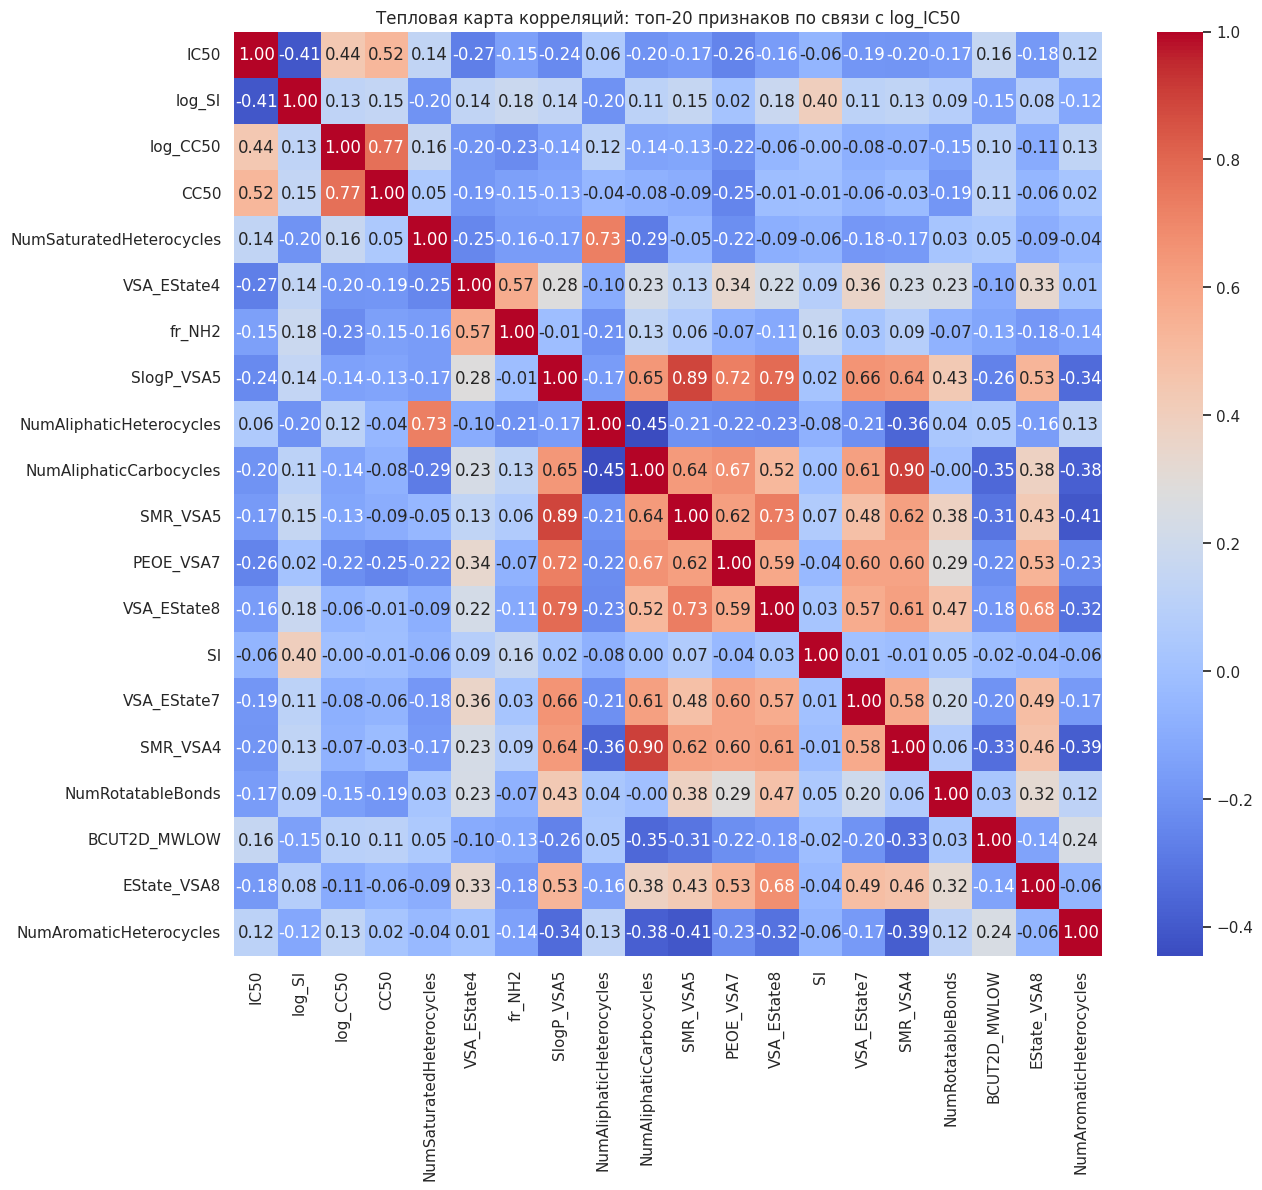

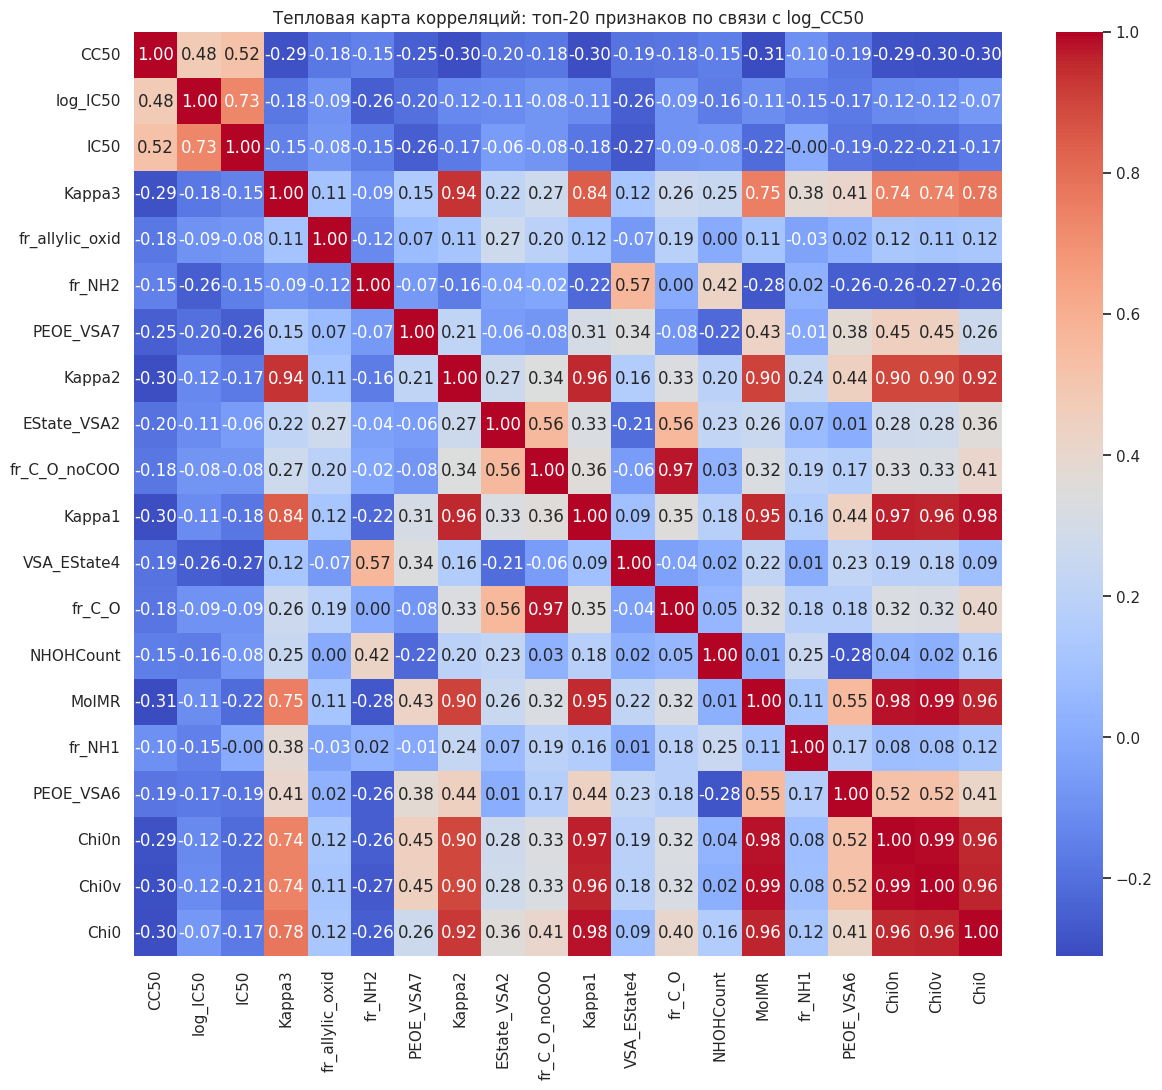

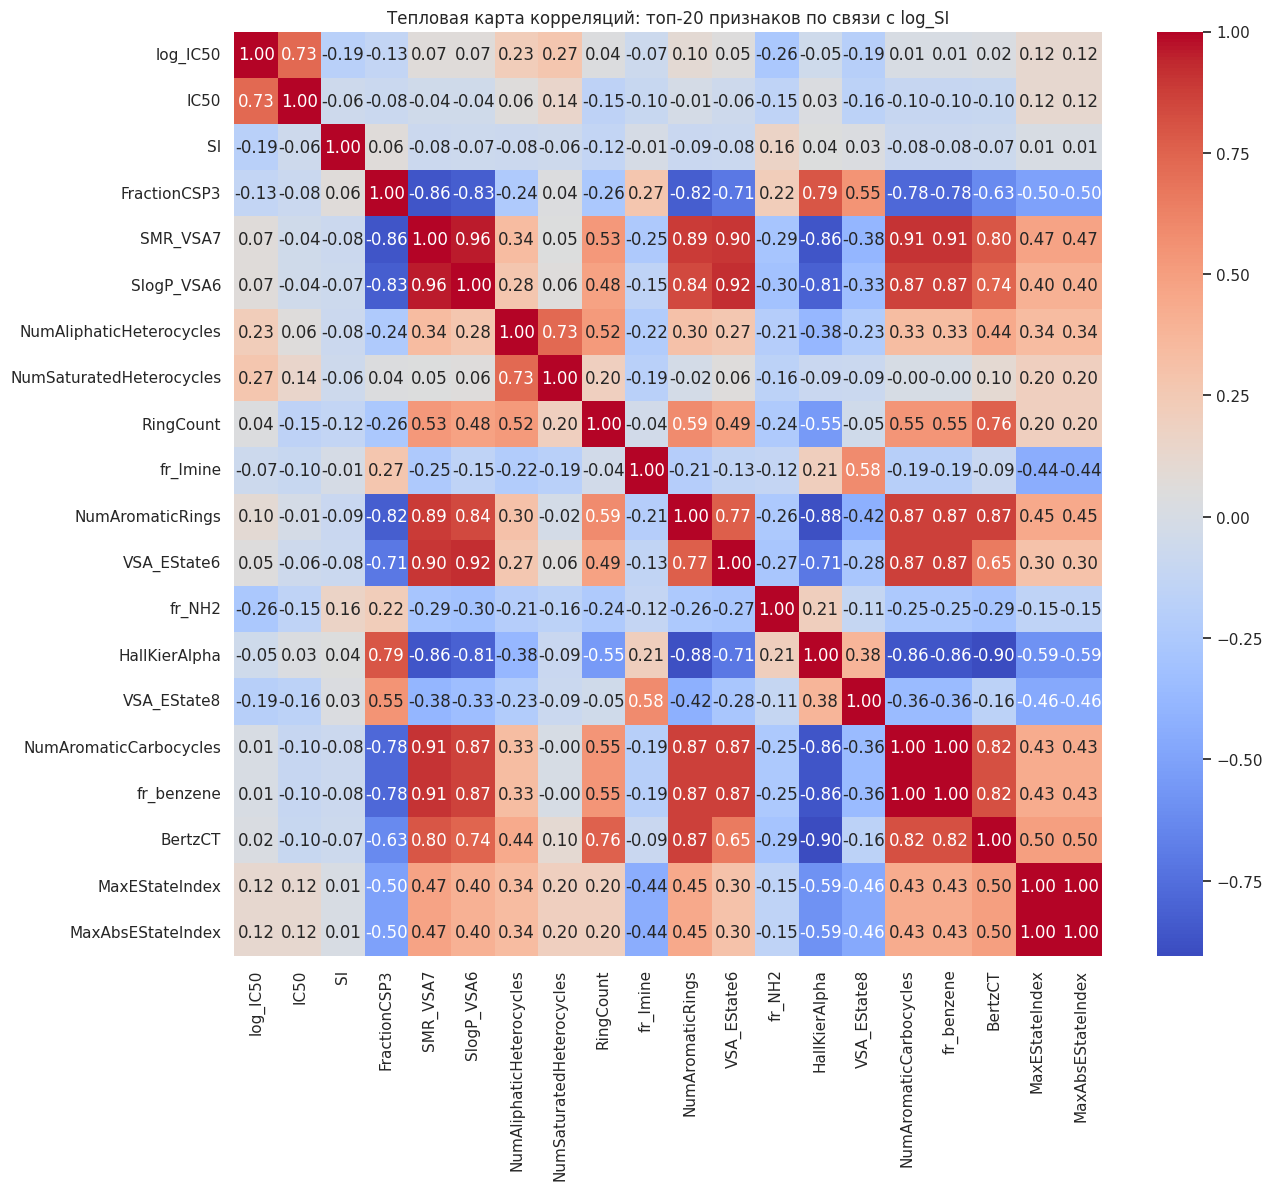

In [19]:
targets = ['log_IC50', 'log_CC50', 'log_SI']

for target in targets:
    top_features = cor[target].abs().sort_values(ascending=False).drop(target).head(20).index
    plt.figure(figsize=(14, 12))
    sns.heatmap(df[top_features].corr(), annot=True, fmt=".2f", cmap="coolwarm")
    plt.title(f"Тепловая карта корреляций: топ-20 признаков по связи с {target}")
    plt.show()

Удаление лишних признаков

Сохраняем HeavyAtomMolWt (корреляция с log_CC50: 0.16)
Сохраняем MaxAbsPartialCharge (корреляция с log_SI: 0.06)
Сохраняем MinAbsPartialCharge (корреляция с log_SI: 0.10)
Сохраняем FpDensityMorgan2 (корреляция с log_CC50: 0.16)
Сохраняем Chi1n (корреляция с log_CC50: 0.18)
Сохраняем Chi3n (корреляция с log_IC50: 0.13)
Сохраняем HallKierAlpha (корреляция с log_SI: 0.18)
Сохраняем Kappa2 (корреляция с log_CC50: 0.21)
Сохраняем SlogP_VSA11 (корреляция с log_SI: 0.07)
Сохраняем SlogP_VSA6 (корреляция с log_SI: 0.21)
Сохраняем NOCount (корреляция с log_SI: 0.09)
Сохраняем NumAromaticCarbocycles (корреляция с log_SI: 0.17)
Сохраняем NumHDonors (корреляция с log_CC50: 0.16)
Сохраняем NumSaturatedCarbocycles (корреляция с log_IC50: 0.18)
Сохраняем fr_Al_OH_noTert (корреляция с log_CC50: 0.03)
Сохраняем fr_COO (корреляция с log_SI: 0.08)
Сохраняем fr_C_O (корреляция с log_CC50: 0.19)
Сохраняем fr_nitro_arom_nonortho (корреляция с log_IC50: 0.05)
Сохраняем fr_phenol (корреляция с log_CC50: 0.09)

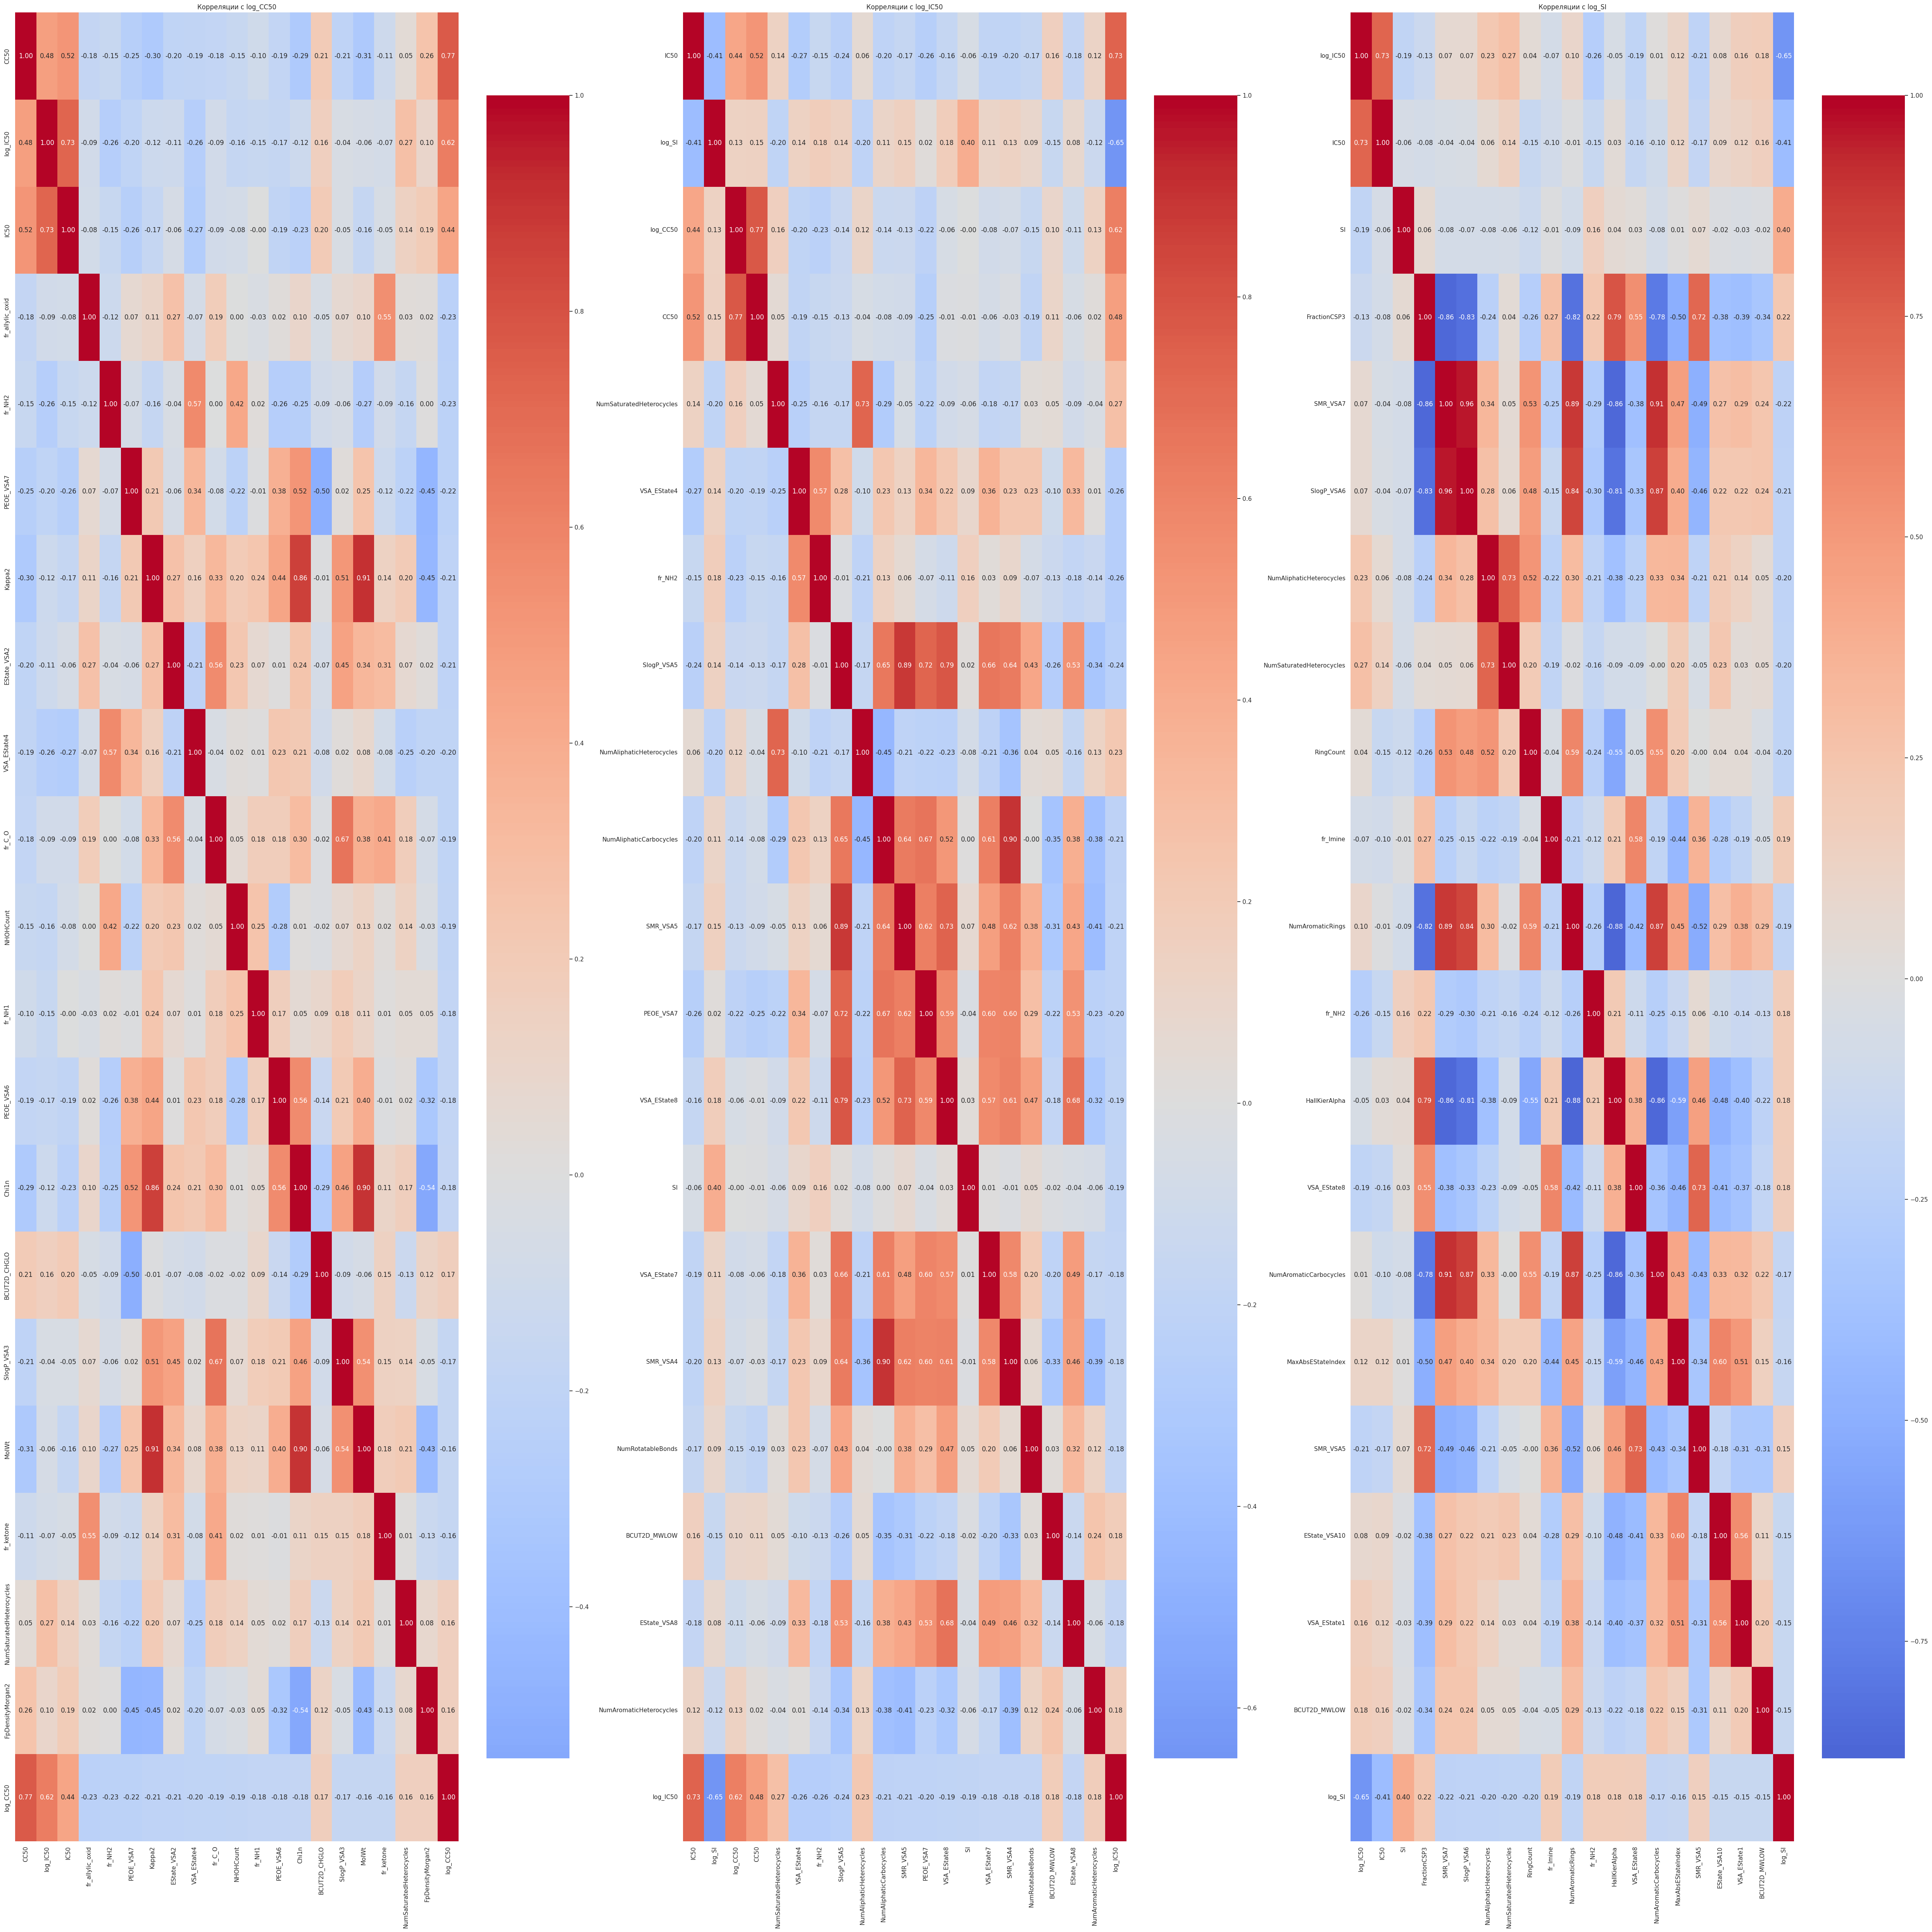

In [22]:
from sklearn.feature_selection import VarianceThreshold
def remove_collinear_features(df, target_columns, threshold=0.9):
    """
    Удаляет мультиколлинеарные признаки на основе порога корреляции.
    Сохраняет признаки, наиболее коррелированные с целевыми переменными.
    """
    # Удаление константных признаков
    selector = VarianceThreshold()
    selector.fit(df.drop(columns=target_columns))
    non_constant_cols = df.drop(columns=target_columns).columns[selector.get_support()]
    df_filtered = df[non_constant_cols.tolist() + target_columns]

    # Удаление дубликатов (корреляция = 1)
    corr_matrix = df_filtered.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    duplicates = [column for column in upper.columns if any(upper[column] > 0.999)]
    df_filtered = df_filtered.drop(columns=duplicates)

    # Удаление мультиколлинеарных признаков (кроме целевых)
    corr_matrix = df_filtered.drop(columns=target_columns).corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    collinear_features = [column for column in upper.columns if any(upper[column] > threshold)]

    # Сохраняем признак с наибольшей корреляцией к целевой переменной
    preserved_features = []
    for feature in collinear_features:
        correlations = df_filtered[target_columns].corrwith(df_filtered[feature]).abs()
        if not preserved_features or feature not in sum([corr_matrix[col][corr_matrix[col] > threshold].index.tolist() for col in preserved_features], []):
            best_target = correlations.idxmax()
            best_corr = correlations.max()
            preserved_features.append(feature)
            print(f"Сохраняем {feature} (корреляция с {best_target}: {best_corr:.2f})")

    # Удаляем остальные
    features_to_drop = list(set(collinear_features) - set(preserved_features))
    df_filtered = df_filtered.drop(columns=features_to_drop)
    print(f"\nУдалено {len(features_to_drop)} мультиколлинеарных признаков: {features_to_drop}")

    return df_filtered

def plot_filtered_heatmaps(df, target_columns, figsize=(50, 50)):
    """
    Рисует тепловые карты корреляций для отобранных признаков.

    """
    plt.figure(figsize=figsize)
    for i, target in enumerate(target_columns, 1):
        plt.subplot(1, len(target_columns), i)
        # Сортируем признаки по абсолютной корреляции с целевой переменной
        corr_with_target = df.corr()[target].drop(target).abs().sort_values(ascending=False)
        top_features = corr_with_target.index[:20]  # Топ-20 признаков
        sns.heatmap(df[top_features.tolist() + [target]].corr(),
                    annot=True, cmap='coolwarm', center=0, fmt=".2f")
        plt.title(f"Корреляции с {target}")
    plt.tight_layout()
    plt.show()

# Целевые переменные
targets = ['log_CC50', 'log_IC50', 'log_SI']

# Удаление мультиколлинеарных признаков
df_filtered = remove_collinear_features(df, targets, threshold=0.9)

# Визуализация очищенных тепловых карт
plot_filtered_heatmaps(df_filtered, targets)

Мы провели EDA. Дальше перейдем к построению моделей.

ВАЖНО! В работе нужно построить и регрессию и классификацию. Для построения регрессии мы будем использовать логарифмированные признаки, однако для классификации использоваться будут исходные. Во избежание ошибок, предикторы (X) и в регрессии и классификации используются логарифмированные.